# DIgital Epidemiology Project 

## Modules

In [101]:
# Network Data Science 
import networkx as nx

# Data Wrangling
import numpy as np
import pandas as pd

# Network Data Analysis 
import networkx as nx
import geonetworkx as gnx

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib import colors
import netwulf as nw
%pylab inline

# Geo-Spatial Data Analysis
import geopandas as gpd
from shapely.geometry import Point, LineString

# Other Utilities
from operator import itemgetter
from collections import defaultdict
import random 
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')

# Custom Modules
import digital_epidemiology as depi

# Reload Custom Modules
from importlib import reload
depi = reload(depi)

Populating the interactive namespace from numpy and matplotlib


## Geospatial Data

### Provinces 

* ISTAT, [Confini delle unità amministrative a fini statistici al 1° Gennaio 2020](https://www.istat.it/it/archivio/222527). (2020)

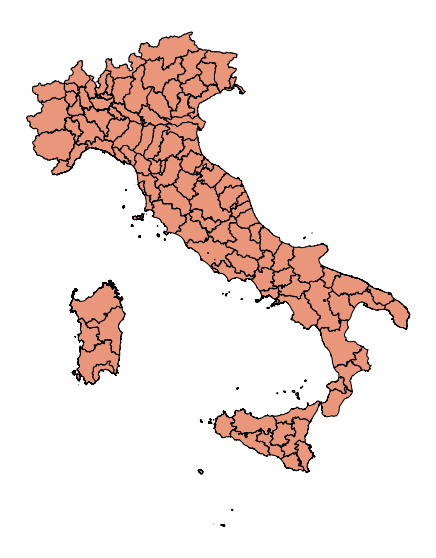

In [102]:
# Set geo-data file path
provinces = "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/ProvCM01012020/ProvCM01012020_WGS84.shp" 

# Store data
provincial_data = gpd.read_file(provinces)

# Visualize GeoDataFrame
provincial_data.plot(figsize=(10, 10),
                     color='darksalmon', 
                     edgecolor='black',
                     alpha=1).set_axis_off()

In [103]:
# GEO-DATA PATHS (ISTAT)
###provinces = "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/ProvCM01012020/ProvCM01012020_WGS84.shp" # PIETRO 1
###provinces = "/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/Shapefiles/ProvCM01012020/ProvCM01012020_WGS84.shp" # PIETRO 2
###provinces = r"C:\Users\Utente\Desktop\Progetti\Python\DigitalEpidemiologyProject/Data\Shapefiles\ProvCM01012020\ProvCM01012020_WGS84.shp" # DAVIDE

# ALTERNATIVE GEO-DATA PATHS (ISTAT, EGM19)
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/ProvCM01012020/ProvCM01012020_WGS84.shp" (AREA)
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/PolbndL.shp" (LINE)
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/PolbndA.shp" (AREA)
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/NUTS_3.shp"  (AREA)

## Mobility Data

* OpenPolis. [Limits of Italian Provinces](https://github.com/openpolis/geojson-italy/blob/master/geojson/limits_IT_provinces.geojson). *GitHub* (2019)
* Pepe, E., Bajardi, P., Gauvin, L. et al. [COVID-19 outbreak response, a dataset to assess mobility changes in Italy following national lockdown](https://doi.org/10.1038/s41597-020-00575-2). *Scientific Data* 7, 230 (2020).

In [104]:
# Load mobility data 
mobility_data = pd.read_csv("/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2020/Pepe2020/flow.csv")[['origin','destination','flow']].rename(columns={'origin':'source', 'destination':'target', 'flow':'weight'})

# Construct mobility edge-list
mobility_edgelist = [tuple(weighted_edge) for weighted_edge in mobility_data.to_numpy()]

# Construct mobility graph (directed weighted)
mobility_graph = nx.DiGraph()
mobility_graph.add_weighted_edges_from(mobility_edgelist)

# Display weighted edges
###mobility_graph.edges(data=True)

# Visualize the mobility graph
###nw.visualize(mobility_graph)

In [105]:
# MOBILITY DATA PATH 
### PIETRO 1: "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2020/Pepe2020/flow.csv"
### PIETRO 2: "/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/CSV/2020/Pepe2020/flow.csv"
### DAVIDE: r"C:\Users\Utente\Desktop\Progetti\Python\DigitalEpidemiologyProject/Data/CSV/2020/Pepe2020/flow.csv"

## Contact Data

* Prem K, Cook AR, Jit M (2017). [Projecting social contact matrices in 152 countries using contact surveys and demographic data](https://doi.org/10.1371/journal.pcbi.1005697). PLoS Comput Biol 13(9).
* Kiesha Prem et al. (2020). [Projecting contact matrices in 177 geographical regions: an update and comparison with empirical data for the COVID-19 era](https://doi.org/10.1101/2020.07.22.20159772). medRxiv pre-print. 

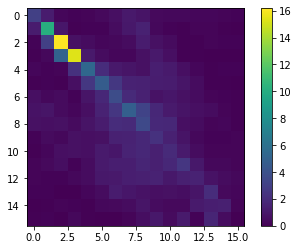

In [106]:
# Load contact data 
contact_data = pd.read_csv("/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2020/ContactMatrixAllLocations.csv")

# Construct contact graph
contact_graph = nx.from_numpy_array(contact_data.to_numpy())

# Display weighted edges
###contact_graph.edges(data=True)

# Visualize the contact graph
#nw.visualize(contact_graph)

# Create the contact matrix 
contact_matrix = contact_data.to_numpy()

# Normalize the contact matrix 
normalized_contact_matrix = normalize(contact_data.to_numpy(), axis=1, norm='l1')

# Visualize the contact matrix 
plt.imshow(contact_matrix)
plt.colorbar()
plt.show()

In [107]:
# CONTACT DATA PATH 
### PIETRO 1: "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2020/ContactMatrixAllLocations.csv"
### PIETRO 2: "/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/CSV/2020/ContactMatrixAllLocations.csv"
### DAVIDE: r"C:\Users\Utente\Desktop\Progetti\Python\DigitalEpidemiologyProject/Data/CSV/2020/ContactMatrixAllLocations.csv"

### Population 

In [108]:
# Load population data 
provincial_demographics = pd.read_csv("/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2020/ProvincialDemographics.csv").rename(columns = {'Codice provincia': 'code', 'Provincia': 'name', 'Età': 'age'})# PIETRO 1

# Add total population per province
provincial_demographics["population"] = provincial_demographics["Totale Maschi"] + provincial_demographics["Totale Femmine"]

# Remove useless fields
provincial_demographics = provincial_demographics.drop(['Maschi celibi', 'Maschi coniugati', 'Maschi divorziati', 'Maschi vedovi', 'Maschi uniti civilmente', 'Maschi già in unione civile (per scioglimento)', 'Maschi già in unione civile (per decesso del partner)', 'Totale Maschi','Femmine nubili', 'Femmine coniugate', 'Femmine divorziate', 'Femmine vedove', 'Femmine unite civilmente', 'Femmine già in unione civile (per scioglimento)', 'Femmine già in unione civile (per decesso del partner)', 'Totale Femmine'], axis=1)

# Filter under-80 population
provincial_demographics_under80 = provincial_demographics[provincial_demographics['age'] < 80]
provincial_demographics_under80.reset_index(drop=True, inplace=True)

# Save under-80 data 
###provincial_demographics_under80.to_csv('/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2020/ProvincialDemographicsUnder80.csv', index=False)

b = []
for i in range(1, len(provincial_demographics_under80["population"]), 5):
    b.append(sum(provincial_demographics_under80["population"][i:i+5]))

provincial_dict = {}
for j in range(107):
    final = []
    for i in range(16):
        final.append(b[16*j+i])
    provincial_dict[provincial_list[j]] = final

In [109]:
# POPULATION DATA PATH 
### PIETRO 1: "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2020/ProvincialDemographics.csv"
### PIETRO 2: "/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/CSV/2020/ProvincialDemographics.csv"
### DAVIDE: r"C:\Users\Utente\Desktop\Progetti\Python\DigitalEpidemiologyProject/Data/CSV/2020/ProvincialDemographics.csv"

# UNDER-80 POPULATION DATA PATH 
### PIETRO 1: "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2020/ProvincialDemographicsUnder80.csv"
### PIETRO 2: "/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/CSV/2020/ProvincialDemographicsUnder80.csv"
### DAVIDE: r"C:\Users\Utente\Desktop\Progetti\Python\DigitalEpidemiologyProject/Data/CSV/2020/ProvincialDemographicsUnder80.csv"

## Model 

Zhao, Z., Zhu, Y., Xu, J. et al. [A five-compartment model of age-specific transmissibility of SARS-CoV-2](https://doi.org/10.1186/s40249-020-00735-x). *Infect Dis Poverty* 9, 117 (2020). 

In [115]:
# Province-level nodal SEIR / SLIR model

def SEIR_age_contact(u,eps,mu,N,status,ite,C):
    """
    status[_,0,_] = S
    status[_,1,_] = E
    status[_,2,_] = I
    status[_,3,_] = R
    """
    
    SE=np.zeros(16)
    delta_SE=np.zeros(16)
    delta_EI=np.zeros(16)
    delta_IR=np.zeros(16)
    
    # S --> L transition rate 
    for i in range(16):
        SE[i] = u * sum(C[i][j] * (float(status[j,2,ite]))/(N[j]) for j in range(16))  
    # L --> I transition rate 
    EI=eps  
    # I --> R transition rate 
    IR=mu                                          
    
    for i in range(16):
        if SE[i] > 0: 
            delta_SE[i]=binomial(status[i,0,ite], SE[i])
        if status[i,1,ite]!=0: 
            delta_EI[i]=binomial(status[i,1,ite], EI)
        if status[i,2,ite]!=0:
            delta_IR[i]=binomial(status[i,2,ite], IR)
    
    for j in range(16):
        status[j,0,ite] -= delta_SE[j]
        status[j,1,ite] += delta_SE[j]
        status[j,1,ite] -= delta_EI[j]
        status[j,2,ite] += delta_EI[j]
        status[j,2,ite] -= delta_IR[j]
        status[j,3,ite] += delta_IR[j]
    
    return 0

https://www.thelancet.com/cms/10.1016/S2468-2667(20)30133-X/attachment/cee85e76-cffb-42e5-97b6-06a7e1e2379a/mmc1.pdf

To calculate the basic reproductive number, R0, defined as the average number of secondary infections generated by a typical infectious individual in a fully susceptible population, we define the ith-row and jth- column element of the next generation matrix as $$ 𝑁𝐺𝑀𝑖𝑗 = 𝑢𝑐𝑖𝑗,𝑡(𝑦𝑗𝐸(𝑑𝑃 + 𝑑𝐶) + (1 − 𝑦𝑗)𝑓𝐸(𝑑𝑆),$$,
where E denotes the expectation. Then, R0 is the absolute value of the dominant eigenvalue of the next generation matrix.

### Parameters

In [116]:
# Population 
N = provincial_dict[1]  # consider the age-stratified population of Turin 

# Contacts
C = contact_matrix      # or normalized_contact_matrix

# Time 
t_max = 1000            # number of time-steps
ite_max = 100           # number of realizations / projections / trajectories

# Transitions 
u = 0.02                # transmission rate per contact
mu = 0.01               # recovery rate
eps = 0.5               # infectivity rate

# Initial conditions 
status = np.zeros((16,4,ite_max)) # a 16(age-groups) x 4(states) x iterations array
for i in range(16):
    for j in range(ite_max):
        status[i,0,j] = N[i]

### Simulations 

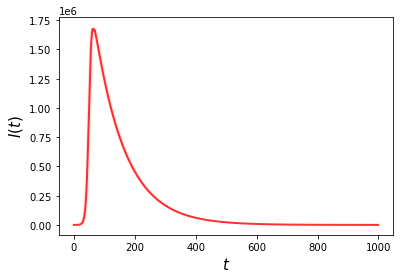

In [117]:
value_per_time={}
#random_index = random.randint(0,len(N)-1)
value = np.zeros((16,4,ite_max,t_max))

for ite in range(ite_max):
    # initial conditions for each iteration
    random_index = random.randint(0,len(N)-1)
    status[random_index,0,ite]-=100
    status[random_index,2,ite]+=100
    
    for t in range(t_max):
        # let's call the function until t=tmax
        SLIR_age_contact(u,eps,mu,N,status,ite,C)
        
        value_per_time.setdefault(t,[])
        value_per_time[t].append( sum(status[j,2,ite] for j in range(16)) )
        
        for j in range(16):
            value[j,2,ite,t] = status[j,2,ite]
        #value_per_time[t].append(status[random_index,2,ite])
        
#print(value_per_time[99])
#print(median(value_per_time[99]))
    
it=[]
it_up=[]
it_down=[]
x=[]
for t in range(t_max):
    med=depi.median(value_per_time[t])
    it.append(med[0][0]) # this is the median
    x.append(t)
    it_up.append(med[0][3]) # this is the 95% RR upper bound
    it_down.append(med[0][4]) # this is the 95% RR lower bound
    
        
plt.plot(it,linewidth=2, color='Red', alpha=0.8) #median

# we can plot the refrence range as shaded area
plt.fill_between(x,it_up, it_down, where=it_up >= it_down, facecolor="Red", interpolate=True,alpha=0.1)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

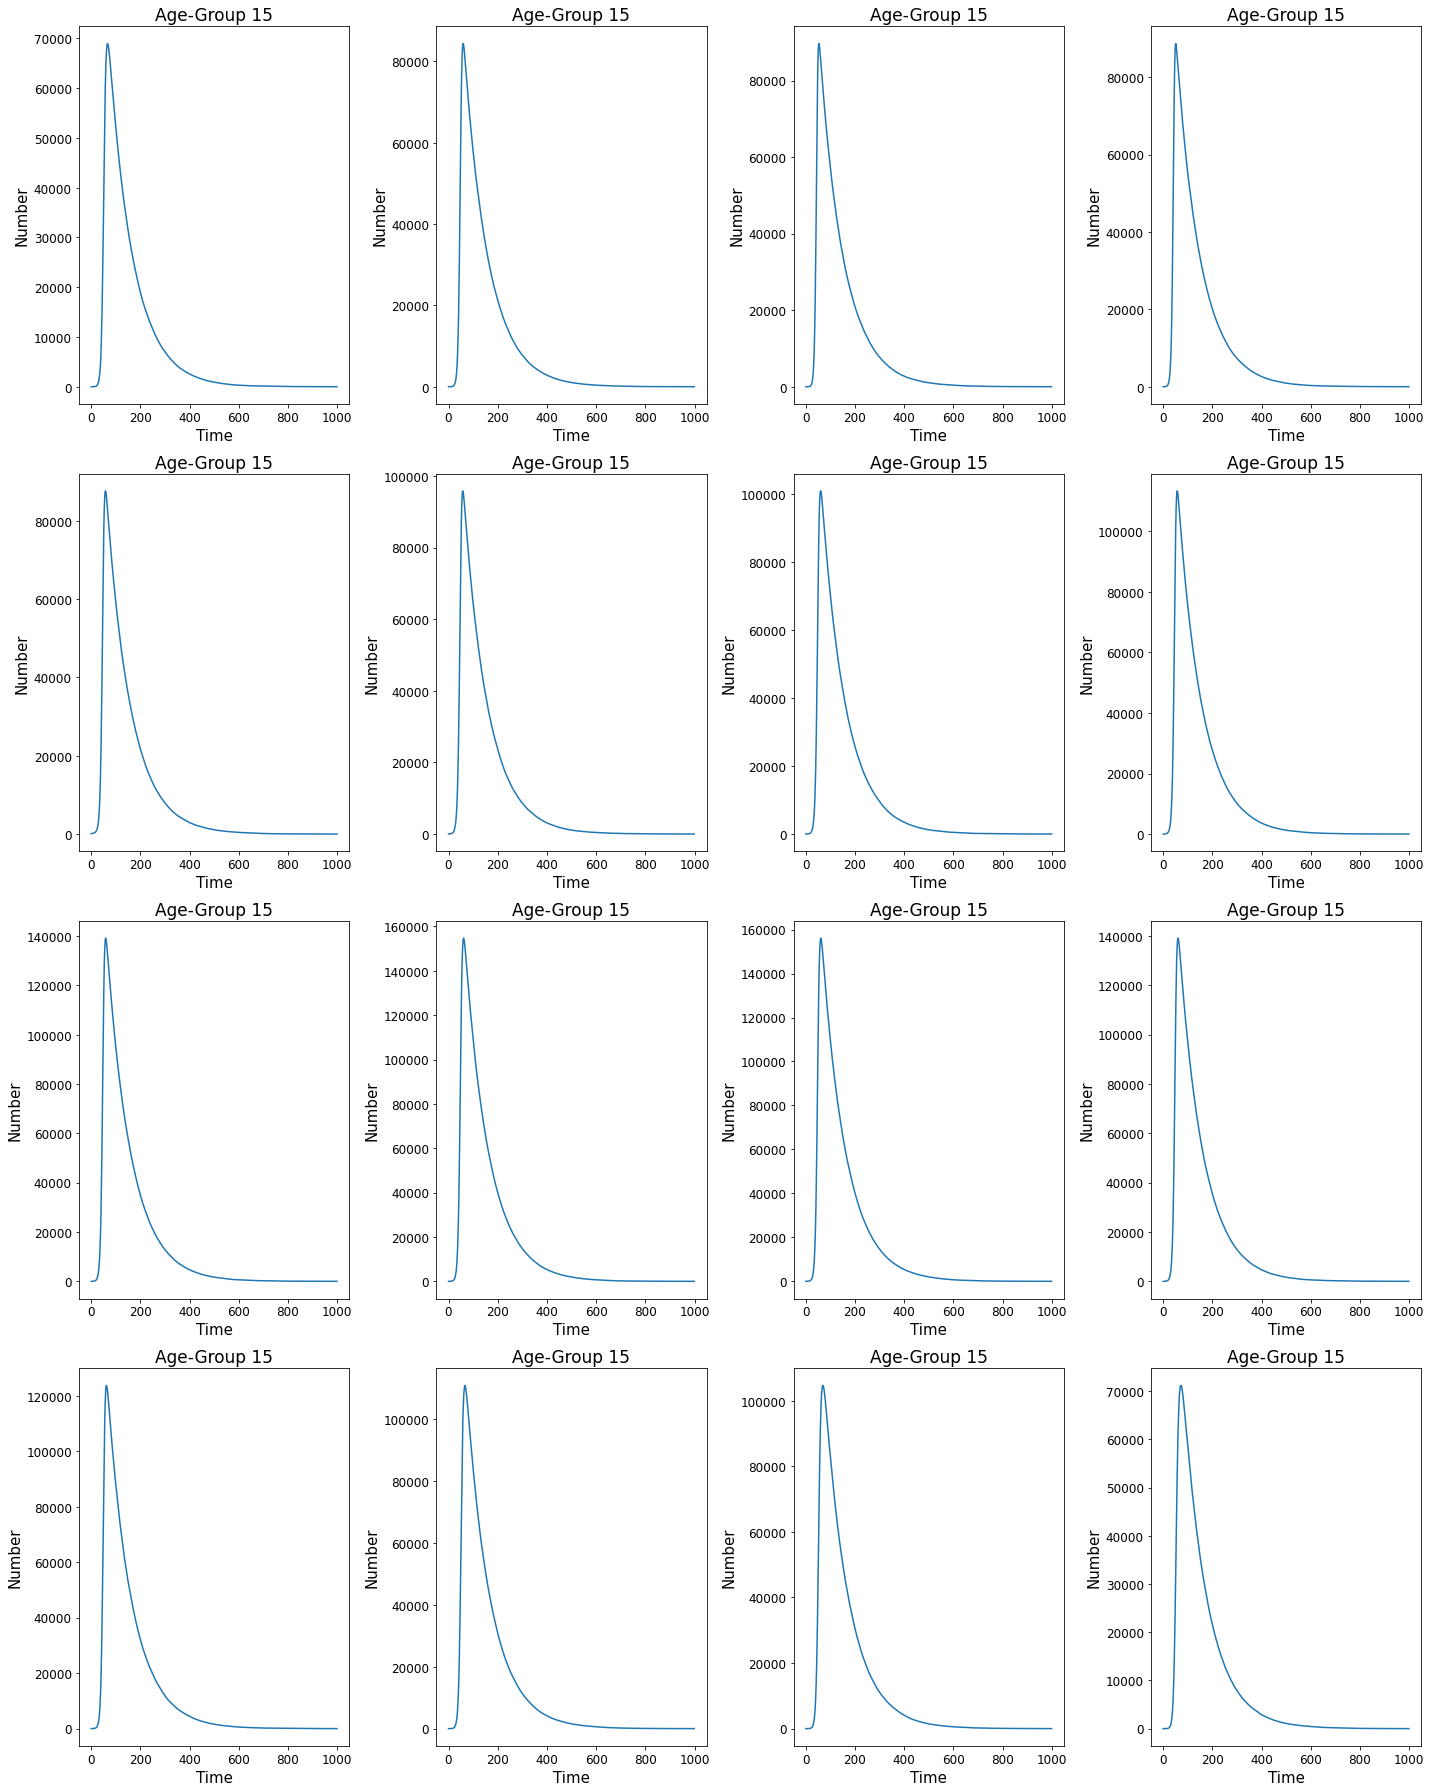

In [118]:
figure(figsize=(20, 25))
for age_group in range(16):
        plt.subplot(4, 4, age_group+1)
        #plt.semilogy()            # set semi-log scale for y axis
        plt.xticks(fontsize=12)  
        plt.yticks(fontsize=12)
        plt.xlabel("Time", fontsize=15)
        plt.ylabel("Number", fontsize=15)
        plt.title(f'Age-Group {age_group}', fontsize=17)
        plt.plot(value[age_group,2,1,:])

plt.tight_layout()

### To-Do List

1. Include Asymptomatic / Subclinical Infected Compartment & Symptomatic / Clinical Infected Compartment

2. Metapopulation implementation coupled by mobility 
    * Read [these slides](https://netmob.org/www15/assets/img/nicola_slides.pdf) by Prof.Perra
    * Read Anne Ewing, Elizabeth C. Lee, Cécile Viboud, Shweta Bansal, Contact, Travel, and Transmission: The Impact of Winter Holidays on Influenza Dynamics in the United States, The Journal of Infectious Diseases, Volume 215, Issue 5, 1 March 2017, Pages 732–739, https://doi.org/10.1093/infdis/jiw642

## Metapopulation 

In [68]:
depi.metapop?

Signature:
depi.metapop(
    t_max,
    N,
    compartments,
    status_subpop,
    G,
    beta,
    mu,
    p,
    theta,
    dij,
)
Docstring: <no docstring>
File:      ~/GitHub/DigitalEpidemiologyProject/Notebooks/Modelling/Python/digital_epidemiology.py
Type:      function
